# 동대문 종합시장 scraper

In [25]:
import pandas as pd
import numpy as np

import requests
from bs4 import BeautifulSoup as bs

from pathlib import Path
from tqdm import tqdm

import itertools
import collections

In [26]:
CUR_PATH = Path('.').resolve()
DATA_PATH = CUR_PATH / 'data'
OUT_PATH = CUR_PATH / 'output'

In [27]:
catcode_list = [
    '10000000', # 원단
    '11000000', # 부자재
    '12000000', # 실
    '13000000', # 레이스
]

In [28]:
def make_url(catcode, page=1):
    
    return f'https://www.ddm-mall.com/store/store.php?page={page}&catcode={catcode}'

In [29]:
def get_div_list(catcode):
    div_list = []

    url = make_url(catcode, page=1)
    res = requests.get(url)
    res_bs = bs(res.content, 'html.parser')
    details = res_bs.find_all('div', {'class': 'storeTable'})
    div_list += details

    max_page = int(res_bs.find('a', {'class': 'page_next2'}).attrs['href'].split('&')[0][6:])

    for page in range(2, max_page+1):
        url = make_url(catcode, page=page)
        res = requests.get(url)
        res_bs = bs(res.content, 'html.parser')
        details = res_bs.find_all('div', {'class': 'storeTable'})
        div_list += details
    
    return div_list


In [30]:
def parse_div(div):
    store_name = div.find('h5')
    li_list = div.find_all('li')

    location = li_list[0].contents[1]
    category_1 = li_list[1].find('span', {'class': 'cate1'}).text
    category_2 = li_list[1].find('span', {'class': 'cate2'}).text
    
    try:
        hashtags_list = li_list[2].find_all('a', {'class': 'hashtag'})
        hashtags_list = [a.text for a in hashtags_list]
    except:
        print('no hashtag?')
        print(f'li_list: {li_list}')
        hashtags_list = []
    
    try:
        telephone = li_list[3].text
        telephone = '02-' + telephone[2:]
    except:
        print('no telephone?')
        print(f'li_list: {li_list}')
        telephone = None

    store_data = {
        'store_name': store_name.text,
        'location': location.text,
        'telephone': telephone,
        'category_1': category_1,
        'category_2': category_2,
        'hashtags': hashtags_list,
    }

    return store_data

In [31]:
data = []

for catcode in tqdm(catcode_list):
    div_list = get_div_list(catcode)
    if div_list:
        div_data = [parse_div(div) for div in div_list]
        data += div_data
    else:
        print('empty div_list?')
        print(f'div_list: {div_list}')

 25%|██▌       | 1/4 [01:43<05:09, 103.12s/it]

no telephone?
li_list: [<li><span class="title">위치</span>C동 2F 2015-1호<a class="loca" data-prdcode="2206280001" data-sfloor="2" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">교직물</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="원단">#원단</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>N동 4F 062호<a class="loca" data-prdcode="2201203593" data-sfloor="4" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">화섬</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="화섬">#화섬</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>N동 4F 024호<a class="loca" data-prdcode="2201203565" data-sfloor="4" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">원단</span><span class="cate2">화섬</span></li>, <li><span class="title">키워드</span><a class="hashta

 50%|█████     | 2/4 [02:18<02:06, 63.21s/it] 

no telephone?
li_list: [<li><span class="title">위치</span>N동 B1F 027호<a class="loca" data-prdcode="2201203641" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">부자재</span><span class="cate2">의류부자재</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="안감">#안감</a> <a class="hashtag" data-keyword="의류부자재">#의류부자재</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>N동 B1F 026호<a class="loca" data-prdcode="2201203640" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">부자재</span><span class="cate2">의류부자재</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="안감">#안감</a> <a class="hashtag" data-keyword="의류부자재">#의류부자재</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>N동 B1F 021호<a class="loca" data-prdcode="2201203635" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><sp

 75%|███████▌  | 3/4 [02:37<00:43, 43.03s/it]

no telephone?
li_list: [<li><span class="title">위치</span>B동 B1F 271-03호<a class="loca" data-prdcode="2201202480" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">실</span><span class="cate2">재봉사</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="재봉사">#재봉사</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>B동 B1F 211호<a class="loca" data-prdcode="2201202407" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">실</span><span class="cate2">원사</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="원사">#원사</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>B동 B1F 210호<a class="loca" data-prdcode="2201202406" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">실</span><span class="cate2">원사</span></li>, <li><span class="title">키워드</span><a class="h

100%|██████████| 4/4 [02:53<00:00, 43.44s/it]

no telephone?
li_list: [<li><span class="title">위치</span>N동 B1F 064호<a class="loca" data-prdcode="2201203678" data-sfloor="B1" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">레이스</span><span class="cate2">기타</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="레이스">#레이스</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>B동 2F 2907호<a class="loca" data-prdcode="2201201850" data-sfloor="2" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">레이스</span><span class="cate2">자수레이스</span></li>, <li><span class="title">키워드</span><a class="hashtag" data-keyword="레이스">#레이스</a> </li>]
no telephone?
li_list: [<li><span class="title">위치</span>B동 2F 2526호<a class="loca" data-prdcode="2201201822" data-sfloor="2" href="javascript:;">위치보기</a></li>, <li><span class="title">구분</span><span class="cate1">레이스</span><span class="cate2">랏셀</span></li>, <li><span class="title">키워드</span><a cla

In [32]:
df = pd.DataFrame(data)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_name  2947 non-null   object
 1   location    2947 non-null   object
 2   telephone   2718 non-null   object
 3   category_1  2947 non-null   object
 4   category_2  2947 non-null   object
 5   hashtags    2947 non-null   object
dtypes: object(6)
memory usage: 138.3+ KB


In [75]:
# df['store_name'] = df['store_name'].apply(lambda bs_obj: bs_obj.text)

In [78]:
# df['location'] = df['location'].apply(lambda bs_obj: bs_obj.text)

In [35]:
df

,store_name,location,telephone,category_1,category_2,hashtags
0,포비전,C동 2F 2015-1호,None,원단,교직물,[#원단]
1,루디아,N동 B1F 087호,02-2267-6605,원단,기타,"[#침구, #누비원단]"
2,형림사,N동 B1F 046호,02-2279-1557~8,원단,화섬,"[#침구, #화섬]"
3,형림사,N동 B1F 017호,02-2279-1557~8,원단,화섬,"[#침구, #누비]"
4,한길상사,N동 B1F 003호,02-2279-5761,원단,기타,"[#심지, #부직포]"
...,...,...,...,...,...,...
2942,영도트림아트,A동 2F 2036호,02-2272-4706,레이스,자수레이스,[#레이스]
2943,제니텍스,A동 2F 2032호,02-2267-2030,레이스,랏셀,[#레이스]
2944,제니텍스,A동 2F 2031호,02-2267-2030,레이스,비즈레이스,[##레이스 #랏셀레이스 #자수레이스 #면레이스 #번아웃레이스 #띠레이스 #원단 #...
2945,제니텍스,A동 2F 2030호,02-2267-2030,레이스,자수레이스,"[#레이스, #랏셀레이스, #자수레이스, #면레이스, #번아웃레이스, #띠레이스, ..."


In [36]:
df.to_pickle('dongdaemoon_data.pickle')

In [37]:
df.to_csv('동대문데이터.csv')

In [38]:
hashtags = list(df['hashtags'].values)

In [39]:
c = collections.Counter(itertools.chain(*hashtags))

In [40]:
hashtag_count_df = pd.DataFrame(c.items(), columns=['hashtag', 'count'])
hashtag_count_df = hashtag_count_df.sort_values(by='count', ascending=False, ignore_index=True)
hashtag_count_df.head(30)

,hashtag,count
0,#화섬,341
1,#레이스,286
2,#액세서리,141
3,#직물,137
4,#의류부자재,123
5,#원사,103
6,#부자재,99
7,#뜨개,98
8,#면직물,88
9,#원단,86


In [42]:
hashtag_count_df.to_pickle('hashtag_count.pickle')

In [43]:
hashtag_count_df.to_csv('해시태그(키워드)랭킹.csv')

<AxesSubplot:>

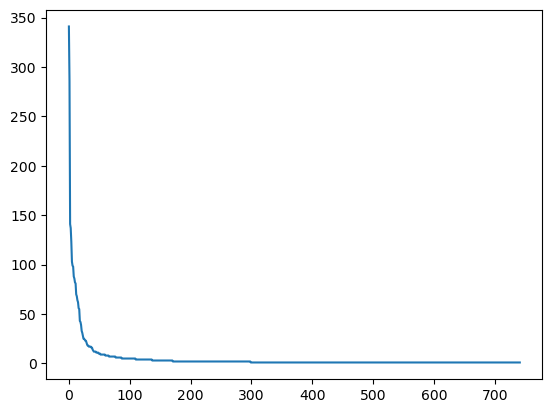

In [41]:
hashtag_count_df['count'].plot()